In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# initialization
def initialize(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [3]:
# model
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [4]:
# cost function
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [5]:
# gradient descent
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
def update(dw, db, w, b, lr):
  w = w - lr * dw
  b = b -lr * db
  
  return w, b

In [7]:
def predict(x, w, b):
  A = model(x, w, b)
  # print(A)

  return A >= .5

In [8]:
from sklearn.metrics import accuracy_score

def artificial_nn(X, y, lr=.1, n_iter=300):
  loss = []
  # initialize W, b
  W, b = initialize(X)

  for i in range(n_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, lr)
  
  y_pred = predict(X, W, b)
  print(f'Acuuracy: {accuracy_score(y, y_pred)}')

  plt.plot(loss)
  plt.show()

  return W, b

In [9]:
from utilities import *

In [10]:
X_train, y_train, X_test, y_test = load_data()

In [11]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [12]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


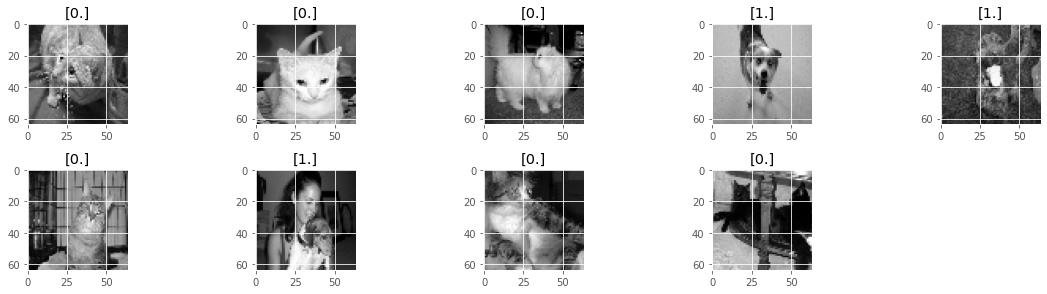

In [13]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [14]:
# X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] )
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)

X_train_reshape.shape, X_test_reshape.shape

((1000, 4096), (200, 4096))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Acuuracy: 0.516


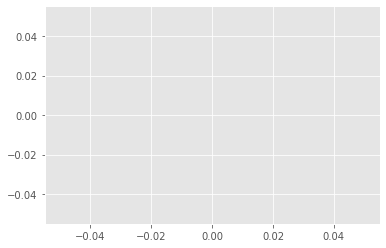

In [15]:
W, b = artificial_nn(X_train_reshape, y_train)